In [25]:
import numpy as np
import torch
import torchaudio
import torchvision
import torch.nn as nn
from IPython.display import Audio, display
import matplotlib.pyplot as plt
from torchaudio import transforms
import librosa
import librosa.display
import os
import random
from tqdm import tqdm
from time import sleep
import sys

In [26]:
def basic_audio_analasis(path):
    PATH = path
    waveform, sample_rate = librosa.load(PATH)

    time_axis = np.linspace(0, waveform.shape[0] / sample_rate, waveform.shape[0])
    freq_axis = np.linspace(-1/2, 1/2, waveform.shape[0]) * sample_rate

    display(Audio(waveform, rate=sample_rate))
    plt.plot(np.linspace(0, waveform.shape[0]/(sample_rate), waveform.shape[0]), waveform)
    plt.show()

    fft = np.fft.fftshift(np.fft.fft(waveform))
    plt.plot(np.linspace(-1/2, 1/2, waveform.shape[0]) * sample_rate, abs(fft))
    plt.show()

    main_freq = (abs(fft).argmax() - waveform.shape[0]/2) * sample_rate / waveform.shape[0]
    print("Strongest freq val: ", main_freq)

    top_freq = (np.where(abs(np.fft.fftshift(np.fft.fft(waveform))) > abs(fft).max() * 0.9)[0] - waveform.shape[0]/2) * sample_rate / waveform.shape[0]
    print("Strongest freq val: ", top_freq)

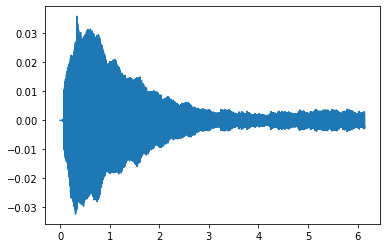

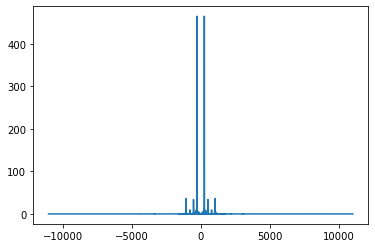

Strongest freq val:  -261.2898936170213
Strongest freq val:  [-261.28989362  261.28989362]


In [27]:
basic_audio_analasis(path="./piano.wav")

In [29]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(Y, sr=sr, hop_length=hop_length, x_axis="time", y_axis=y_axis)
    plt.colorbar(format="%+2.f")
    
    plt.figure(figsize=(10, 5))
    plt.plot(sig)
    plt.show()

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

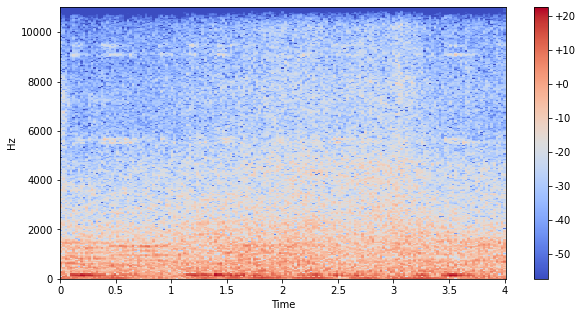

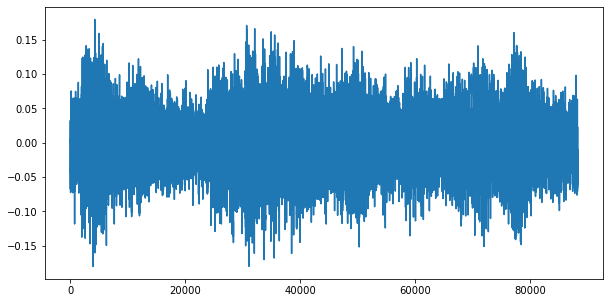

 20%|████████████████▊                                                                   | 1/5 [00:00<00:02,  1.53it/s]

**********
22050
(88200,)
(257, 173)


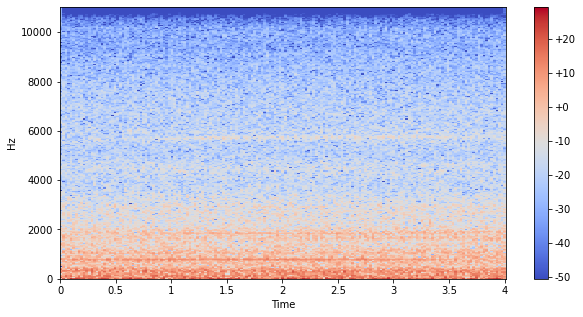

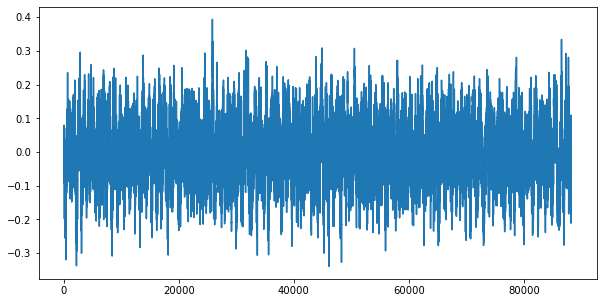

 40%|█████████████████████████████████▌                                                  | 2/5 [00:01<00:01,  1.67it/s]

**********
22050
(88200,)
(257, 173)


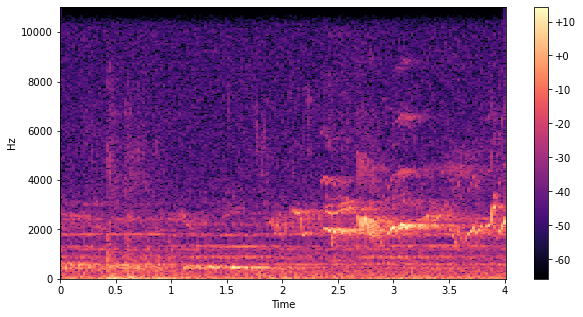

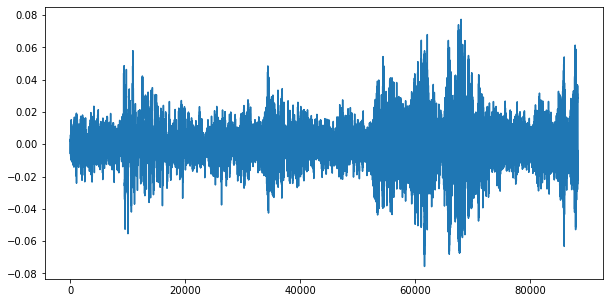

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:01<00:01,  1.67it/s]

**********
22050
(88200,)
(257, 173)


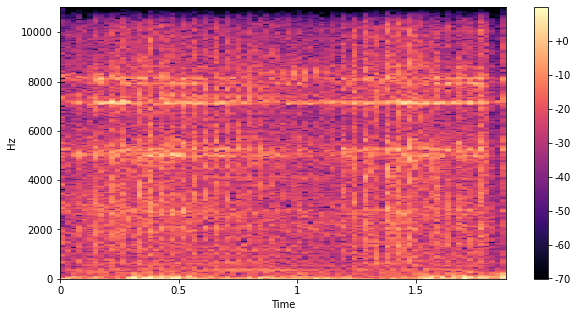

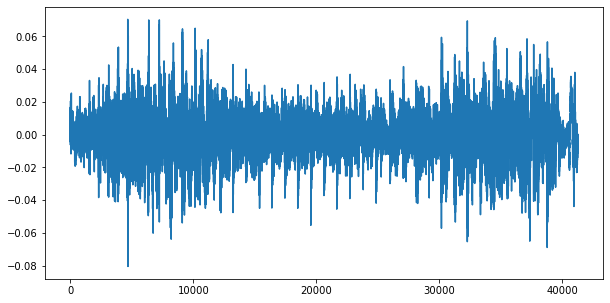

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:02<00:00,  1.75it/s]

**********
22050
(41234,)
(257, 81)


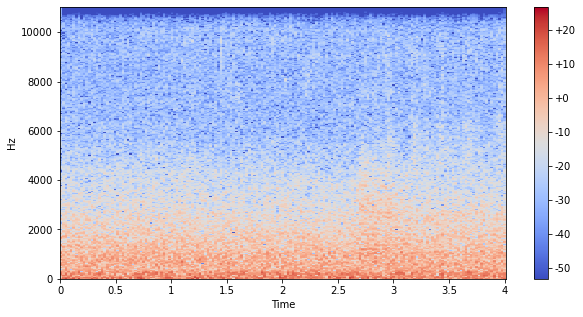

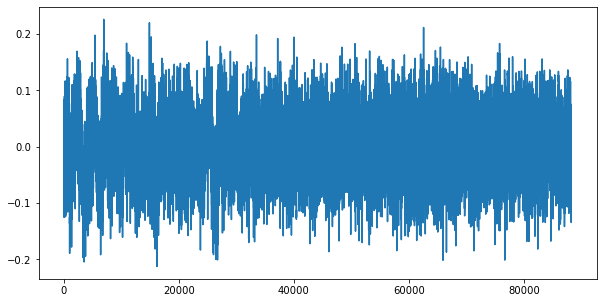

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.70it/s]

**********
22050
(88200,)
(257, 173)


In [35]:
paths = os.listdir("./UrbanSound8K/audio/fold10/")
random.shuffle(paths)

for PATH in tqdm(paths[0:5]):
    
    if PATH[0] == '.':
        continue
    
    PATH = "./UrbanSound8K/audio/fold10/" + PATH
    sig, sr = librosa.load(PATH)
    
    FRAME_SIZE = 512
    HOP_SIZE = 512

    display(Audio(sig, rate=sr))

    S_scale = librosa.stft(sig, win_length=HOP_SIZE, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
    Y_scale = abs(S_scale)**2
    Y_db = librosa.power_to_db(Y_scale)
    plot_spectrogram(Y_db, sr, HOP_SIZE)
    
    print("*"*10)
    print(sr)
    print(sig.shape)
    print(Y_db.shape)
    
    


In [36]:
y_out = librosa.istft(stft_matrix=S_scale, win_length=HOP_SIZE, hop_length=HOP_SIZE)
y_out.shape

(88064,)

In [37]:
basic_audio_analasis()